In [2]:
#Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import shuffle 
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from PlotNonlinear import plotDecBoundaries_Nonlinear

ModuleNotFoundError: ignored

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/559/dataset/Dry_Bean_train.csv')
df2 = pd.read_csv('/content/drive/MyDrive/559/dataset/Dry_Bean_test.csv')

In [ ]:
#Algorithm for multiclass perceptron

class Multiclass_perceptron:
    def __init__(self,x_train,y_train,x_test,y_test,learning_rate,W_0,max_epochs):
        self.Xtrain = x_train
        self.Xtest = x_test
        self.Ytrain = y_train
        self.Ytest = y_test
        self.learning_rate = learning_rate
        self.WM = W_0*np.ones((self.Xtrain.shape[1],np.unique(self.Ytrain).shape[0]))
        self.max_epoch = max_epochs
        
#ceriterion function
    def JW(self,w):
        dm = []
        running_sum = 0
        for i in self.Xtrain:
            dm.append(np.dot(w.T, i))

        for i,j in zip(dm,self.Ytrain):
            running_sum += i[j] - max(i)
        return -1*running_sum
#confusion_matrix
    def gen_confusion_matrix(self, w):
        dm = np.array([np.dot(w.T, i) for i in self.Xtest])
        ykes = np.array([np.argmax(distance) for distance in dm])
        cm = confusion_matrix(self.Ytest, ykes)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()
        plt.figure()
        plt.show()
        return cm
# accuracy
    def accuracy(self, w):
        true = 0
        false = 0
        dm= []
        ykes = []
        for i in self.Xtest:
            dm.append(np.dot(w.T, i))
        for i in dm:
            ykes.append(np.argmax(i))
    
        train_true = 0
        train_false = 0
        dm_train= []
        ykes_train = []
        
        for i in self.Xtrain:
            dm_train.append(np.dot(w.T, i))
        for i in dm_train:
            ykes_train.append(np.argmax(i))
        
        for i,j in zip(ykes, self.Ytest):
            if(i==j):
                true+=1
            else:
                false+=1
        for i,j in zip(ykes_train, self.Ytrain):
            if(i==j):
                train_true+=1
            else:
                train_false+=1
        return train_true*100/self.Ytrain.shape[0], true*100/self.Ytest.shape[0]
    
#stochastic_gradient_descent
    def stochastic_gradient_descent(self):
        epoch = 1
        iteration = 0
        X = np.copy(self.Xtrain)
        Y = np.copy(self.Ytrain)
        W = np.copy(self.WM)
        w_array = np.zeros((100,17,7))
        j_array = np.zeros(100)
        while (epoch <= self.max_epoch):
            X,Y = shuffle(X,Y)
            k=0
            for i, j in zip(X,Y):
                iteration +=1
                g = np.dot(W.T, i)
                yk = np.argmax(g)
                if(yk != j):
                    W[:,j] = W[:,j] + self.learning_rate*i
                    W[:,yk] = W[:,yk] - self.learning_rate*i
                if(epoch == self.max_epoch and iteration > 1224800):
                    w_array[k] = W
                    jw = self.JW(W)
                    j_array[k] = jw
                    k+=1   
            epoch +=1
            if(epoch==101):
                min_i = np.argmin(j_array)
                w_opt = w_array[min_i]
                print(f"Lowest J(w):{min(j_array)}")
                return w_opt

    def print_weight_norms(self, w,loop=False):
      k=0
      weight_norms = np.zeros(7)
      for i in w.T:
        norm = np.linalg.norm(i)
        weight_norms[k] = norm
        k+=1
      return weight_norms
  
  

In [ ]:

x_train = df1.drop("Class",axis =1)
y_train = df1["Class"].map({'BARBUNYA':0,'BOMBAY':1, 'CALI':2,'HOROZ':3,'DERMASON':4,'SEKER':5,'SIRA':6 })

x_test = df2.drop("Class",axis =1)
y_test = df2["Class"].map({'BARBUNYA':0,'BOMBAY':1, 'CALI':2,'HOROZ':3,'DERMASON':4,'SEKER':5,'SIRA':6 })

std_scaler = StandardScaler()
x_train_n = std_scaler.fit_transform(x_train)
x_test_n = std_scaler.transform(x_test)

x_train_n = np.column_stack((np.ones(x_train_n.shape[0]), x_train_n[:,:]))
x_test_n = np.column_stack((np.ones(x_test_n.shape[0]), x_test_n[:,:]))
    

Lowest J(w):8700.61735903112


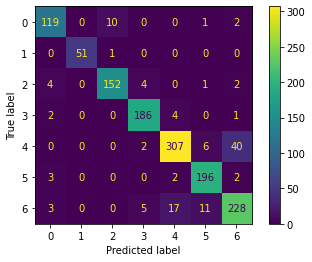

<Figure size 432x288 with 0 Axes>

In [ ]:
#Running the MP Algorithm once
p1 = Multiclass_perceptron(x_train_n, y_train, x_test_n, y_test, 1,1, 100)
W= p1.stochastic_gradient_descent()
accuracy_train, accuracy_test = p1.accuracy(W)
cm = p1.gen_confusion_matrix(W)
norms = p1.print_weight_norms(W)

In [ ]:
#accuracy for test and train
accuracy_test, accuracy_train

(90.96916299559471, 91.63196995673117)

In [ ]:
#norm and weight
norms, W.T

(array([ 96.84525381, 112.2527285 ,  72.3440428 ,  95.18252288,
         72.59639847,  68.0826236 , 100.45173002]),
 array([[ 14.        ,   3.58233372,  17.50003813, -27.2044661 ,
          25.6096596 , -42.74897801, -23.22200501,   6.94558944,
           1.9318149 ,   1.86896378,  -6.76662944,  -8.53772926,
          -5.30448449,  25.44444669, -60.74222054, -16.92823431,
          16.59392421],
        [-65.        ,  47.1443528 ,   7.68500914,   6.08333902,
          17.67865328,  -9.41504885,  -0.27297579,  47.5079043 ,
          11.88850371,   1.90245836,  -2.05763379,  24.00227577,
          10.00329585,  42.88387814,  25.38366508,   9.03240292,
           2.90836833],
        [ -4.        ,   0.8045277 , -26.26482886,  32.1049177 ,
          -7.30334353, -18.39338203,  16.52455741,   7.17693375,
          13.81869542,   3.67783546,  -2.8392808 ,   6.00022201,
          -9.72446361, -44.32386792,  17.09065423, -12.58231345,
          -4.70096299],
        [  9.        , -27.39218

Trail No : 1
Lowest J(w):11093.019553452628


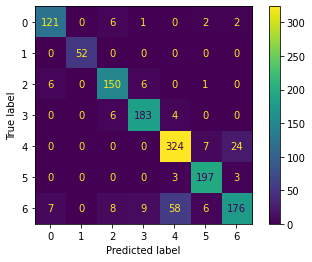

<Figure size 432x288 with 0 Axes>

Trail No : 2
Lowest J(w):10471.961124126297


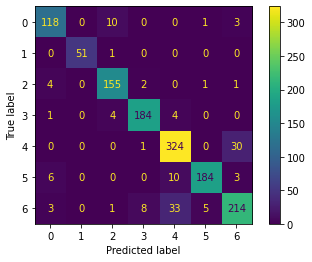

<Figure size 432x288 with 0 Axes>

Trail No : 3
Lowest J(w):8950.611761775182


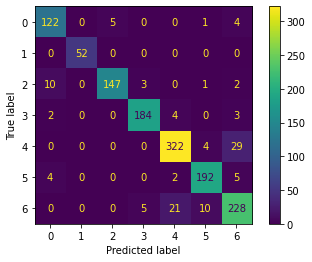

<Figure size 432x288 with 0 Axes>

Trail No : 4
Lowest J(w):13919.530125365824


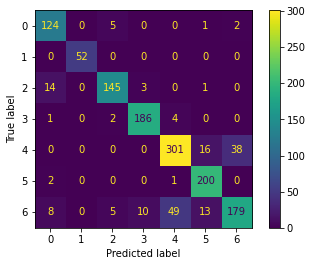

<Figure size 432x288 with 0 Axes>

Trail No : 5
Lowest J(w):9644.40624379378


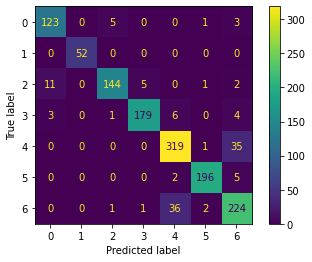

<Figure size 432x288 with 0 Axes>

Trail No : 6
Lowest J(w):10636.145716715093


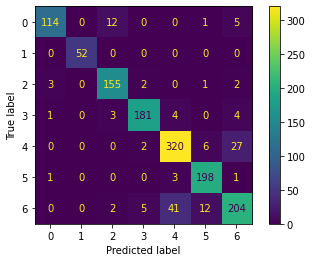

<Figure size 432x288 with 0 Axes>

Trail No : 7
Lowest J(w):9836.467949029333


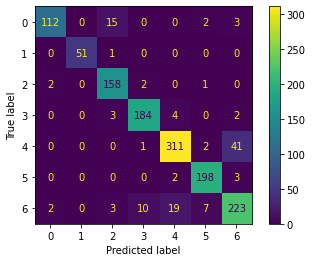

<Figure size 432x288 with 0 Axes>

Trail No : 8
Lowest J(w):8921.320066635577


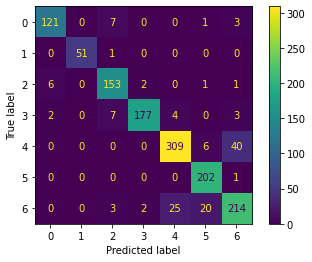

<Figure size 432x288 with 0 Axes>

Trail No : 9
Lowest J(w):12487.853770883188


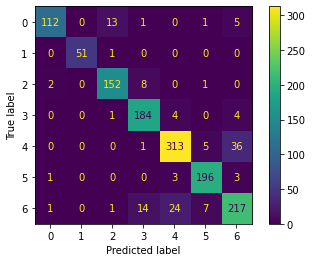

<Figure size 432x288 with 0 Axes>

Trail No : 10
Lowest J(w):8065.908850253128


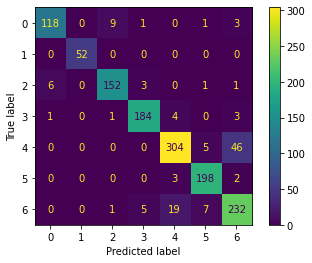

<Figure size 432x288 with 0 Axes>

In [ ]:
#Running the algorithm 10 times
norms_matrix_10 = np.zeros((10,7))
cm_matrix_10 = np.zeros((10,7,7))
accuracy_test_matrix_10 = np.zeros(10)
accuracy_train_matrix_10 = np.zeros(10)

for i in range(10):
  print(f"Trail No : {i+1}")
  p1 = Multiclass_perceptron(x_train_n, y_train, x_test_n, y_test, 1,1, 100)
  W= p1.stochastic_gradient_descent()
  accuracy_train, accuracy_test = p1.accuracy(W)
  cm = p1.gen_confusion_matrix(W)
  norms = p1.print_weight_norms(W)
  accuracy_train_matrix_10[i] = accuracy_train
  accuracy_test_matrix_10[i] = accuracy_test
  norms_matrix_10[i] = norms
  cm_matrix_10[i] = cm

In [ ]:
#standard deviation
np.std(accuracy_train_matrix_10), np.std(accuracy_test_matrix_10)

(0.9502693816137177, 1.2610760019167055)

In [ ]:
#mean
np.mean(norms_matrix_10, axis = 0), np.std(norms_matrix_10, axis = 0)

(array([ 96.54624329, 110.9276722 ,  73.10532082,  95.87439677,
         74.66390563,  67.42895278, 100.39235067]),
 array([1.561559  , 2.91917159, 1.88348893, 2.84915534, 1.18042527,
        1.13416369, 2.03256937]))

In [ ]:
#confusion matrix
mean_conf_matrix = np.mean(cm_matrix_10,axis = 0)
std_conf_matrix = np.std(cm_matrix_10, axis = 0)

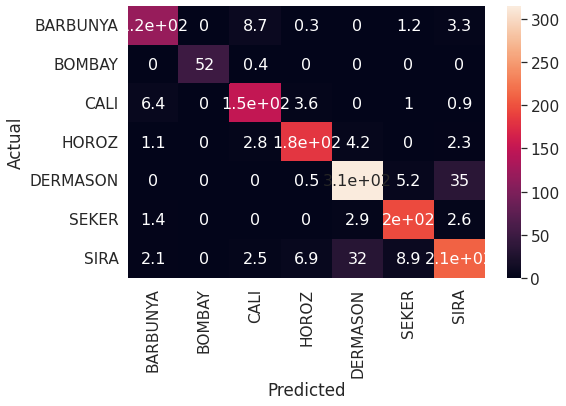

In [ ]:
#plotting
labels = ['BARBUNYA','BOMBAY', 'CALI','HOROZ','DERMASON','SEKER','SIRA']
df_cm = pd.DataFrame(mean_conf_matrix, columns=labels, index = labels)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# 

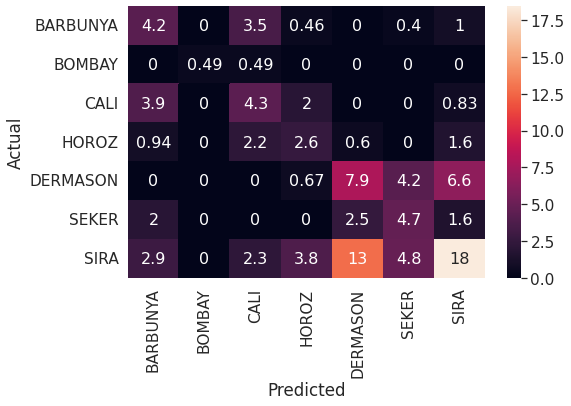

In [ ]:
#plotting
labels = ['BARBUNYA','BOMBAY', 'CALI','HOROZ','DERMASON','SEKER','SIRA']
df_cm = pd.DataFrame(std_conf_matrix, columns=labels, index = labels)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# 

In [ ]:
class preceptron:
    
    #defining all the variables
    def __init__(self,x_train,y_train,x_test,y_test,learning_rate,W_0,max_epochs,c):
        self.Xtrain = x_train
        self.Xtest = x_test
        self.Ytrain = y_train
        self.Ytest = y_test
        self.learning_rate = learning_rate
        self.WM = W_0*np.ones(self.Xtrain.shape[1])
        self.max_epoch = max_epochs
        self.c =c    
     
    #Multiplying class 2 with -1
    def reflect_class2_points(self):
        zx = np.copy(self.Xtrain)
        for i in range(self.Xtrain.shape[0]):
            if(self.Ytrain[i]!=self.c):
                zx[i] = -1*self.Xtrain[i]
        print("Zn=-1 multiplied to other class")
        return zx
              
    #perceptron main function
    def algo_sequential(self):
        iteration = 0
        epoch = 1 
        weight_matrix_iteration = []
        jw_val_list_iteration = []
        wi = np.copy(self.WM)
        X = self.reflect_class2_points()
        Y = np.copy(self.Ytrain)
        
        while(epoch <= self.max_epoch):
            X,Y= shuffle(X,Y)
            jw_val = 0
            for i in X: 
                iteration+=1  
                if(np.dot(wi.T,i)<=0):
                    wi = wi + self.learning_rate*(i)
                   
                if(epoch == self.max_epoch and iteration >= 1224800):
                    jw_val = self.JW(wi)
                    weight_matrix_iteration.append(wi)
                    jw_val_list_iteration.append(jw_val) 
            
            if(epoch==self.max_epoch):
                min_index = jw_val_list_iteration.index(min(jw_val_list_iteration))
                w_opt = weight_matrix_iteration[min_index]
                return w_opt
            epoch+=1
            
    #criterion_function
    def JW(self,w):
        dm = []
        running_sum = 0
        for i in self.Xtrain:
            dm.append(np.dot(w.T, i))
        for i in dm:
            if(i<=0):
                running_sum+=i
        return -1*running_sum

    #prediction 
    def predict(self,w):
        classification_error = 0
        acc = 0
        for i,j in zip(self.Xtest,self.Ytest):
            if(np.dot(w.T,i)<=0 and j!=self.c):
                acc+=1
            elif(np.dot(w.T,i)>0 and j==self.c):
                acc+=1
            else:
                classification_error +=1
        print("Test Accuracy = ",acc*100/len(self.Xtest))
        print("Test Error Rate = ",classification_error*100/len(self.Xtest))

        train_classification_error = 0
        train_acc = 0
        for i,j in zip(self.Xtrain,self.Ytrain):
            if(np.dot(w.T,i)<=0 and j!=self.c):
                train_acc+=1
            elif(np.dot(w.T,i)>0 and j==self.c):
                train_acc+=1
            else:
                train_classification_error +=1
        print("Train Accuracy = ",train_acc*100/len(self.Xtrain))
        print("Train Error Rate = ",train_classification_error*100/len(self.Xtrain)) 
           
    #MaximalValueMethod    
    def MaximalValueMethod(self, W0,W1,W2,W3,W4,W5,W6):
        acc=0
        err = 0
        for i,j in zip(self.Xtrain,self.Ytrain):
            l=np.zeros(7)
            l[0] = np.dot(W0.T,i)
            l[1] = np.dot(W1.T,i)
            l[2] = np.dot(W2.T,i)
            l[3] = np.dot(W3.T,i)
            l[4] = np.dot(W4.T,i)
            l[5] = np.dot(W5.T,i)
            l[6] = np.dot(W6.T,i)
            plabel = np.argmax(l)
            if(plabel == j):
                acc+=1
            else:
                err+=1
        print("Train Accuracy :",acc*100/len(self.Xtrain))
        
        acc=0
        err = 0
        for i,j in zip(self.Xtest,self.Ytest):
            l=np.zeros(7)
            l[0] = np.dot(W0.T,i)
            l[1] = np.dot(W1.T,i)
            l[2] = np.dot(W2.T,i)
            l[3] = np.dot(W3.T,i)
            l[4] = np.dot(W4.T,i)
            l[5] = np.dot(W5.T,i)
            l[6] = np.dot(W6.T,i)
            plabel = np.argmax(l)
            if(plabel == j):
                acc+=1
            else:
                err+=1
        print("Test Accuracy :",acc*100/len(self.Xtest))
        
        
    def MaximalValueMethod_rule2(self, W0,W1,W2,W3,W4,W5,W6):
        acc=0
        err = 0
        for i,j in zip(self.Xtrain,self.Ytrain):
            l=np.zeros(7)
            l[0] = np.dot(W0.T,i)/np.linalg.norm(W0[1:])
            l[1] = np.dot(W1.T,i)/np.linalg.norm(W1[1:])
            l[2] = np.dot(W2.T,i)/np.linalg.norm(W2[1:])
            l[3] = np.dot(W3.T,i)/np.linalg.norm(W3[1:])
            l[4] = np.dot(W4.T,i)/np.linalg.norm(W4[1:])
            l[5] = np.dot(W5.T,i)/np.linalg.norm(W5[1:])
            l[6] = np.dot(W6.T,i)/np.linalg.norm(W6[1:])
            plabel = np.argmax(l)
            if(plabel == j):
                acc+=1
            else:
                err+=1
        print("Train Accuracy :",acc*100/len(self.Xtrain))
        
        acc=0
        err = 0
        for i,j in zip(self.Xtest,self.Ytest):
            l=np.zeros(7)
            l[0] = np.dot(W0.T,i)/np.linalg.norm(W0[1:])
            l[1] = np.dot(W1.T,i)/np.linalg.norm(W1[1:])
            l[2] = np.dot(W2.T,i)/np.linalg.norm(W2[1:])
            l[3] = np.dot(W3.T,i)/np.linalg.norm(W3[1:])
            l[4] = np.dot(W4.T,i)/np.linalg.norm(W4[1:])
            l[5] = np.dot(W5.T,i)/np.linalg.norm(W5[1:])
            l[6] = np.dot(W6.T,i)/np.linalg.norm(W6[1:])
            plabel = np.argmax(l)
            if(plabel == j):
                acc+=1
            else:
                err+=1
        print("Test Accuracy :",acc*100/len(self.Xtest))

    #onevsrest  
    def onevsrest(self, W0,W1,W2,W3,W4,W5,W6):
        acc=0
        err = 0
        ind = 0
        for i,j in zip(self.Xtrain,self.Ytrain):
            l=np.zeros(7)
            l[0] = np.dot(W0.T,i)
            l[1] = np.dot(W1.T,i)
            l[2] = np.dot(W2.T,i)
            l[3] = np.dot(W3.T,i)
            l[4] = np.dot(W4.T,i)
            l[5] = np.dot(W5.T,i)
            l[6] = np.dot(W6.T,i)
            plabel = np.where(l > 0)
                     
            if(len(plabel[0])> 1 or len(plabel[0])==0):
                ind+=1
            else: 
                if(plabel[0][0]==j):
                    acc+=1
                else:
                    err+=1
        print("Train Accuracy :",acc*100/len(self.Xtrain))
        print("Train Error :",err*100/len(self.Xtrain))
        print("Train Unclassified :",ind*100/len(self.Xtrain))
        
        acc=0
        err = 0
        ind = 0
        for i,j in zip(self.Xtest,self.Ytest):
            l=np.zeros(7)
            l[0] = np.dot(W0.T,i)
            l[1] = np.dot(W1.T,i)
            l[2] = np.dot(W2.T,i)
            l[3] = np.dot(W3.T,i)
            l[4] = np.dot(W4.T,i)
            l[5] = np.dot(W5.T,i)
            l[6] = np.dot(W6.T,i)
            plabel = np.where(l>0)
            if(len(plabel[0])> 1 or len(plabel[0])==0):
                ind+=1
            else: 
                if(plabel[0][0]==j):
                    acc+=1
                else:
                    err+=1
        print("Test Accuracy :",acc*100/len(self.Xtest))
        print("Test Error :",err*100/len(self.Xtest))
        print("Test Unclassified :",ind*100/len(self.Xtest))
            
            
        
        

    #Used for plotting
    def Db(self,w):
        x = np.copy(self.train_data_x[:,1:])
        y = np.copy(self.train_data_y)

        x_min = min(x[:,0])
        x_max = max(x[:,0])
        plane = np.linspace(x_min,x_max)

        boundary = -(w[0]+w[1]*plane)/w[2]

        plt.scatter(x[y==1,0],x[y==1,1],label = "class 1")
        plt.scatter(x[y==2,0],x[y==2,1],label = "class 2")
        plt.plot(plane, boundary,color="red", label = "Decision Boundary")
        plt.ylabel("x1")
        plt.xlabel("x0")
        plt.legend()
        plt.show()
        

    

          

In [ ]:
#implementinf all algorithms here
p1 = preceptron(x_train_n, y_train, x_test_n, y_test, 1,1, 100,0)
W0= p1.algo_sequential()
p1.predict(W0)


Zn=-1 multiplied to other class
Test Accuracy =  97.87077826725404
Test Error Rate =  2.129221732745962
Train Accuracy =  98.3427218548453
Train Error Rate =  1.6572781451547065


In [ ]:
#for weight-1
p1 = preceptron(x_train_n, y_train, x_test_n, y_test, 1,1, 100,1)
W1= p1.algo_sequential()
p1.predict(W1)

Zn=-1 multiplied to other class
Test Accuracy =  100.0
Test Error Rate =  0.0
Train Accuracy =  100.0
Train Error Rate =  0.0


In [ ]:
#for weight-2
p1 = preceptron(x_train_n, y_train, x_test_n, y_test, 1,1, 100,2)
W2= p1.algo_sequential()
p1.predict(W2)

Zn=-1 multiplied to other class
Test Accuracy =  97.50367107195301
Test Error Rate =  2.4963289280469896
Train Accuracy =  97.57531227038942
Train Error Rate =  2.4246877296105804


In [ ]:
#for weight-3
p1 = preceptron(x_train_n, y_train, x_test_n, y_test, 1,1, 100,3)
W3= p1.algo_sequential()
p1.predict(W3)

Zn=-1 multiplied to other class
Test Accuracy =  98.23788546255507
Test Error Rate =  1.7621145374449338
Train Accuracy =  98.17127928810515
Train Error Rate =  1.8287207118948485


In [ ]:
#for weight-4
p1 = preceptron(x_train_n, y_train, x_test_n, y_test, 1,1, 100,4)
W4= p1.algo_sequential()
p1.predict(W4)

Zn=-1 multiplied to other class
Test Accuracy =  93.61233480176212
Test Error Rate =  6.387665198237886
Train Accuracy =  94.7914115437995
Train Error Rate =  5.2085884562005065


In [ ]:
#for weight-5
p1 = preceptron(x_train_n, y_train, x_test_n, y_test, 1,1, 100,5)
W5= p1.algo_sequential()
p1.predict(W5)

Zn=-1 multiplied to other class
Test Accuracy =  98.45814977973568
Test Error Rate =  1.5418502202643172
Train Accuracy =  98.26108253734999
Train Error Rate =  1.7389174626500123


In [ ]:
#for weight-6
p1 = preceptron(x_train_n, y_train, x_test_n, y_test, 1,1, 100,6)
W6= p1.algo_sequential()
p1.predict(W6)

Zn=-1 multiplied to other class
Test Accuracy =  93.02496328928046
Test Error Rate =  6.97503671071953
Train Accuracy =  93.34639562413258
Train Error Rate =  6.653604375867418


In [ ]:
# calculating accuracy,error,unclassified for both train and test(one vs rest)
p1.onevsrest(W0,W1,W2,W3,W4,W5,W6)

Train Accuracy : 85.56616866682995
Train Error : 4.677932892481019
Train Unclassified : 9.755898440689036
Test Accuracy : 84.72834067547724
Test Error : 5.4331864904552125
Test Unclassified : 9.838472834067547


In [ ]:
# calculating accuracy (MaximalValueMethod)
p1.MaximalValueMethod(W0,W1,W2,W3,W4,W5,W6)

Train Accuracy : 91.24826516450322
Test Accuracy : 90.45521292217327


In [ ]:
# calculating accuracy (MaximalValueMethod 2)
p1.MaximalValueMethod_rule2(W0,W1,W2,W3,W4,W5,W6)

Train Accuracy : 91.28092089150135
Test Accuracy : 90.23494860499265
